In [2]:
import pandas as pd
import numpy as np
#Visualization
import matplotlib.pyplot as plt
import folium
import seaborn as sns
# Timeseries
import datetime
# xls files
import xlrd

# data_exp, etl: source 1 (COVID-19 confirmed cases)

In [3]:
# read source file
try:
    !rm time_series_covid19_confirmed_global.csv
finally:
    !wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/
        csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

covid19_global_data = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [4]:
# Check file contents
covid19_global_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30


In [5]:
# Check file size
# rows: Country or Province (country dependent)
# columns: number of confirmed COVID-19 cases daily updated
covid19_global_data.shape

(266, 105)

In [6]:
# 'Country/Region' represents the country name
covid19_global_data['Country/Region'].nunique()

187

## Data preparation

In [7]:
# Provided csv file with ISO3166 country code
wdi_country = pd.read_csv('WDICountry.csv')

In [8]:
# Merge on key to obtain ISO3166 code
covid19_global_data_cc = pd.merge(right=covid19_global_data, 
                                  left=wdi_country[['Country Code','Short Name']], 
                                  how='right', 
                                  right_on='Country/Region', 
                                  left_on='Short Name')

In [9]:
# After merge some ISO3166 country codes have no match, due to typos or updates
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Bahamas','Country Code'] = 'BHS'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Congo (Brazzaville)','Country Code'] = 'COG'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Congo (Kinshasa)','Country Code'] = 'COD'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Cote d\'Ivoire','Country Code'] = 'CIV'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Czechia','Country Code'] = 'CZE'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Gambia','Country Code'] = 'GMB'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Holy See','Country Code'] = 'VAT'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Korea, South','Country Code'] = 'KOR'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Kyrgyzstan','Country Code'] = 'KGZ'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Saint Lucia','Country Code'] = 'LCA'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Saint Vincent and the Grenadines','Country Code'] = 'VCT'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Slovakia','Country Code'] = 'SVK'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Taiwan*','Country Code'] = 'TWN'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='US','Country Code'] = 'USA'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Syria','Country Code'] = 'SYR'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Laos','Country Code'] = 'LAO'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Saint Kitts and Nevis','Country Code'] = 'KNA'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Burma','Country Code'] = 'MMR'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Western Sahara','Country Code'] = 'ESH'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Sao Tome and Principe','Country Code'] = 'STP'
covid19_global_data_cc.loc[covid19_global_data_cc['Country/Region']=='Kosovo','Country Code'] = 'RKS'

In [10]:
# Update ISO3166 for states with missing country codes
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='French Guiana','Country Code'] = 'GUF'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='French Polynesia','Country Code'] = 'PYF'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Guadeloupe','Country Code'] = 'GLP'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Mayotte','Country Code'] = 'GLP'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='New Caledonia','Country Code'] = 'NCL'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Reunion','Country Code'] = 'REU'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Saint Barthelemy','Country Code'] = 'BLM'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='St Martin','Country Code'] = 'MAF'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Martinique','Country Code'] = 'MTQ'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Saint Pierre and Miquelon','Country Code'] = 'SPM'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Bermuda','Country Code'] = 'BMU'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Cayman Islands','Country Code'] = 'CYM'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Channel Islands','Country Code'] = 'GGY'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Gibraltar','Country Code'] = 'GIB'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Isle of Man','Country Code'] = 'IMN'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Montserrat','Country Code'] = 'MSR'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Anguilla','Country Code'] = 'AIA'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='British Virgin Islands','Country Code'] = 'VGB'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Turks and Caicos Islands','Country Code'] = 'TCA'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Falkland Islands (Malvinas)','Country Code'] = 'FLK'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Aruba','Country Code'] = 'ABW'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Curacao','Country Code'] = 'CUW'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Sint Maarten','Country Code'] = 'SXM'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Bonaire, Sint Eustatius and Saba','Country Code'] = 'BES'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Faroe Islands','Country Code'] = 'FRO'
covid19_global_data_cc.loc[covid19_global_data_cc['Province/State']=='Greenland','Country Code'] = 'GRL'

In [11]:
# Some rows from the original file lack ISO3166 representation
covid19_global_data_cc[(covid19_global_data_cc['Lat'] == 0) & (covid19_global_data_cc['Long'] == 0)]

,Country Code,Short Name,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
46,CAN,Canada,Diamond Princess,Canada,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47,CAN,Canada,Recovered,Canada,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,NaN,NaN,NaN,Diamond Princess,0.0,0.0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712
263,NaN,NaN,NaN,MS Zaandam,0.0,0.0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


In [12]:
# Drop Diamond Princess, MS Zaandam, Canada Recovered
covid19_global_data_cc.drop([46,47,246,261],inplace=True)
# Drop replicates
covid19_global_data_cc.drop('Short Name',axis=1,inplace=True)
# Drop Lat/Long
covid19_global_data_cc.drop(['Lat','Long'],axis=1,inplace=True)

In [13]:
# United States, Australia, China and Canada report cases based on states
covid19_global_data_cc = covid19_global_data_cc.groupby(['Country Code']).sum()
covid19_global_data_cc.reset_index(inplace=True)

In [14]:
# Add ISO3166 2-alpha codes
covid19_global_data_cc = pd.merge(left=wdi_country[['Country Code','2-alpha code']], 
                                  right=covid19_global_data_cc, 
                                  how='right', 
                                  left_on='Country Code', 
                                  right_on='Country Code')
# Countries with 0 confirmed cases, will show up as Nan
covid19_global_data_cc = covid19_global_data_cc.fillna(0)

In [15]:
# From Kaggle public datasets, updated coordinates for ISO3166 2-alpha codes
try:
    !rm countries.csv
finally:
    !wget https://developers.google.com/public-data/docs/canonical/countries_csv
    
global_data_lat_long = pd.read_csv('countries.csv')

In [16]:
# Update coordinates based on ISO3166 2-alpha code
covid19_global_data_cc = pd.merge(left=covid19_global_data_cc, 
                                  right=global_data_lat_long[['country','latitude','longitude']], 
                                  how='left', 
                                  left_on='2-alpha code', 
                                  right_on='country')

In [17]:
# Check if all countries have coordinates
covid19_global_data_cc[~(covid19_global_data_cc['2-alpha code'] == covid19_global_data_cc['country'])]

,Country Code,2-alpha code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,country,latitude,longitude
43,CUW,CW,0,0,0,0,0,0,0,0,...,16,16,16,16,16,16,16,NaN,NaN,NaN
109,MAF,MF,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,NaN,NaN,NaN
127,NAM,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,16,16,NaN,NaN,NaN
160,SSD,SS,0,0,0,0,0,0,0,0,...,5,6,6,34,34,35,45,NaN,NaN,NaN
167,SXM,SX,0,0,0,0,0,0,0,0,...,73,74,74,75,75,75,76,NaN,NaN,NaN
193,AIA,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,NaN,NaN,NaN
194,BES,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,6,NaN,NaN,NaN
195,BLM,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,NaN,NaN,NaN
196,ESH,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,NaN,NaN,NaN
197,FLK,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,NaN,NaN,NaN


In [18]:
# >> As I included small archipielagos ISO3166 codes, some data is missing
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='CUW',['latitude','longitude']] = 12.116667, -68.933333
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='MAF',['latitude','longitude']] = 18.05, -63.08
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='NAM',['latitude','longitude']] = -22, 17
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='SSD',['latitude','longitude']] = 4.85, 31.6
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='SXM',['latitude','longitude']] = 18.033333, -63.05
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='AIA',['latitude','longitude']] = 18.2232706, -63.0566336
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='BES',['latitude','longitude']] = 12.183333, -68.233333
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='BLM',['latitude','longitude']] = 17.8961800, -62.8497800
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='ESH',['latitude','longitude']] = 25, -13
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='FLK',['latitude','longitude']] = -51.7, -57.85
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='GGY',['latitude','longitude']] = 49.465691, -2.585278
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='GLP',['latitude','longitude']] = 15.9985400, -61.7254800
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='GUF',['latitude','longitude']] = 4.9333300, -52.3333300
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='MSR',['latitude','longitude']] = 16.7055500, -62.2129200
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='MTQ',['latitude','longitude']] = 14.6089200, -61.0733400
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='REU',['latitude','longitude']] = -20.8823100, 55.4504000
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='RKS',['latitude','longitude']] = 42.667542, 21.166191
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='SPM',['latitude','longitude']] = 46.7809100, -56.1719600
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='TWN',['latitude','longitude']] = 25.066667, 121.516667
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='VAT',['latitude','longitude']] = 41.9025, 12.4525

In [19]:
# >> Also some ISO3166 2 alpha codes are missimg
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='NAM',['2-alpha code']] = 'NA'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='AIA',['2-alpha code']] = 'AI'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='BES',['2-alpha code']] = 'BQ'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='BLM',['2-alpha code']] = 'BL'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='ESH',['2-alpha code']] = 'EH'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='FLK',['2-alpha code']] = 'FK'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='GGY',['2-alpha code']] = 'GG'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='GLP',['2-alpha code']] = 'GP'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='GUF',['2-alpha code']] = 'GF'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='MSR',['2-alpha code']] = 'MS'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='MTQ',['2-alpha code']] = 'MQ'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='REU',['2-alpha code']] = 'RE'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='RKS',['2-alpha code']] = 'XK'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='SPM',['2-alpha code']] = 'PM'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='TWN',['2-alpha code']] = 'TW'
covid19_global_data_cc.loc[covid19_global_data_cc['Country Code']=='VAT',['2-alpha code']] = 'VA'

In [20]:
# Drop duplicates
covid19_global_data_cc.drop('country',axis=1,inplace=True)
# Rearrange column names
covid19_global_data_cc.rename(columns={'Country Code': 'iso3_cc','2-alpha code': 'iso2_cc'},inplace=True)
cols = list(covid19_global_data_cc.columns)
covid19_global_data_cc = covid19_global_data_cc[cols[0:2]+cols[-2:]+cols[2:-2]]
# Nan values
covid19_global_data_cc.fillna(0,inplace=True)
# final result
covid19_global_data_cc.head()

,iso3_cc,iso2_cc,latitude,longitude,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,ABW,AW,12.521110,-69.968338,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100
1,AFG,AF,33.939110,67.709953,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
2,AGO,AO,-11.202692,17.873887,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30
3,ALB,AL,41.153332,20.168331,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
4,AND,AD,42.546245,1.601554,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745


In [23]:
# store results in csv file
covid19_global_data_cc.to_csv('covid19_global_data_cc.csv',index=False)

## Visualization

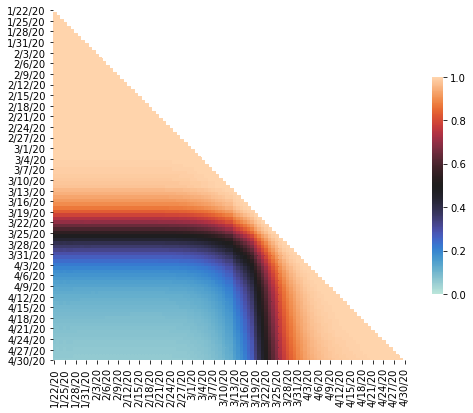

In [47]:
# correlation matrix
corr = covid19_global_data_cc.iloc[:,4:].corr()
f, ax = plt.subplots(figsize=(8, 8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# use seaborn heatmap
sns.heatmap(corr, mask= mask, vmin = 0, vmax=1, center=0.5, square=True, cbar_kws={"shrink": .5})

This correlation matrix shows how the COVID-19 spread worldwide. After the really firts cases reported back to 1/22/20, mainly in China. That's why during the first 5 weeks of the COVID-19 pandemy, correlation is ~1, because reported cases worldwide were low. 

But, shortly after 3/13/20, the spread of the virus starts and correlation falls quickly, suggesting that transmission rates are noticeable different in each country. And in a matter of 2 weeks since 3/13/20, correlation is getting to 0, so every country has its own mechanisms to fight the virus.

In [75]:
# Let's plot how many days elapsed until 90k COVID-19 cases were reported
number_cases = 90e3
# run through every country code
for cc in range(covid19_global_data_cc.shape[0]):
    first= covid19_global_data_cc.iloc[cc,4:].ge(number_cases)
    if(first.any() == True):
        days = (datetime.datetime.strptime(first.idxmax(),'%m/%d/%y') - datetime.datetime(2020, 1, 22)).days
    else:
        days = np.NaN
    # store days per country basis
    d.update({covid19_global_data_cc.iloc[cc,0]: [days] })
# dict > dataframe
dut = pd.DataFrame.from_dict(d, orient='index')
dut.reset_index(inplace=True)
dut.rename(columns={'index': 'cc', 0: 'days'},inplace=True)
# plot data available
worldmap(dut['cc'],dut['days'],'Elapsed days from 1/22/20 until {} COVID19 cases recorded'.format(number_cases),0)

In [77]:
# Alternatively sort countries by days elapsed
dut.sort_values('days').head(10)

,cc,days
183,USA,65.0
89,ITA,66.0
56,ESP,69.0
47,DEU,72.0
61,FRA,79.0
64,GBR,83.0
178,TUR,89.0
85,IRN,95.0
149,RUS,97.0
25,BRA,100.0


Here, we find a first idea of the transmission rate per country. And remember, these number represents the days elapsed since 1/22/20 until 90.000 cases were confirmed. 

In [79]:
# Let's plot how many cases were reported from 4/30/20 to 5/1/20
date = ['5/1/20',1]
# 
if(date[1]>0):
    startdate = (pd.to_datetime(date[0]) - pd.DateOffset(days=date[1])).strftime('%-m/%-d/%y')
    dut_value = covid19_global_data_cc[date[0]]-covid19_global_data_cc[startdate]
    legend = 'COVID19 cases from ' + startdate + ' to ' + date[0]
else:
    dut_value = covid19_global_data_cc[date[0]]
    legend = 'COVID19 cases on ' + date[0]

worldmap(covid19_global_data_cc['iso3_cc'], dut_value, legend, 1)

From this plot we can observe whereas some countries are already in a negative slope transmission rate, others are in the positive side of the slope.

# data_exp, etl: source 2 (world data indicators)

Rationale behind using world data indicators, is to help explain country behaviors and COVID-19 transmission rate

In [6]:
# read source file
try:
    !rm time_series_covid19_confirmed_global.csv
finally:
    !wget http://databank.worldbank.org/data/download/WDI_csv.zip
    !unzip WDI_csv.zip

wdi_data = pd.read_csv('WDIData.csv')

In [11]:
# Check columns and values
wdi_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,95.939242,95.962166,96.352930,95.997833,96.649916,96.834184,97.003974,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [14]:
# Check file size
# rows: Country and Indicator code
# columns: yearly updated values from 1960-2019
wdi_data.shape

(377256, 65)

In [8]:
# 'Country Code' shows how many countries are represented
wdi_data['Country Code'].nunique()

264

In [9]:
# On average every country is represented by indicators code
wdi_data['Indicator Code'].nunique()

1429

## Visualization

In [48]:
# read source file with geo locations for worldmap plots
try:
    !rm world-countries.json
finally:
    !wget https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json

geo_data = 'world-countries.json'

In [49]:
# create a function to ease the plot of indicators and world maps
def worldmap(dut_cc, dut_value, legend, logscale):
    """
    dut_cc: ISO3166 coutry code
    dut_value: indicator code
    legend: suitable info for map plotting
    logscale: 1/0 if log scale is desirable
    """
    if(logscale==1):
        dut_value.values[dut_value<0]=0
    # dict type > dataframe
    d = {'Country Code': dut_cc, 'Value': dut_value}
    dut_data = pd.DataFrame(data=d)
    # world map at zoom level
    world_map = folium.Map(location=[20,0], zoom_start=1.75)
    # linear or log scale
    if(logscale==1):
        threshold_scale=np.logspace(0, round(np.log10(dut_data['Value'].max()),1),10)
        threshold_scale[0]=0; threshold_scale[-1]=dut_data['Value'].max()+1
    else:
        threshold_scale=np.linspace(dut_data['Value'].min(),dut_data['Value'].max(),10)
        threshold_scale[-1]=dut_data['Value'].max()+1
    # apply choropleth based on location coordiantes
    folium.Choropleth(
        geo_data=geo_data, data=dut_data, columns=['Country Code','Value'],
        key_on='feature.id', 
        fill_color='Greens', 
        fill_opacity=0.7, 
        line_opacity=0.2,
    # when no data is available, use white color to represent
        nan_fill_color='White',
        threshold_scale=threshold_scale,
        highlight=True,
        legend_name=legend).add_to(world_map)


    return(world_map)

In [51]:
# To ease indicators codes readout, a separate file contains its coding scheme
wdi_cets = pd.read_excel('WDI_CETS.xls', sheet_name='WDI series')
wdi_cets.head()

,Series Code,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
0,AG.AGR.TRAC.NO,"Agricultural machinery, tractors",Environment,Agricultural production,NaN,NaN
1,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,Environment,Agricultural production,NaN,NaN
2,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,Environment,Agricultural production,NaN,NaN
3,AG.LND.AGRI.K2,Agricultural land (sq. km),Environment,Land use,NaN,NaN
4,AG.LND.AGRI.ZS,Agricultural land (% of land area),Environment,Land use,NaN,NaN


In [57]:
# show population density indicator
indicator= ['EN.POP.DNST','2018']
dut = wdi_data[wdi_data['Indicator Code'] == indicator[0]]
worldmap(dut['Country Code'], dut[indicator[1]] , indicator[0]+': '+indicator[1], 1)

In [52]:
# show the '%' of population whose age > 65 year
indicator= ['SP.POP.65UP.TO.ZS','2018']
dut = wdi_data[wdi_data['Indicator Code'] == indicator[0]]
worldmap(dut['Country Code'], dut[indicator[1]] , indicator[0]+': '+indicator[1], 0)

In [56]:
# plot indicator for: Life expectancy at birth, total (years)
indicator= ['SP.DYN.LE00.IN','2018']
dut = wdi_data[wdi_data['Indicator Code'] == indicator[0]]
worldmap(dut['Country Code'], dut[indicator[1]] , indicator[0]+': '+indicator[1], 0)